In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns
import networkx as nx
import matplotlib.colors as mcolors
from scipy import stats
# pd.options.display.max_rows = None
# pd.options.display.max_columns = None
import glob as glob
import math
pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
from scipy.stats import shapiro

* New dataframes normalized for the cerebellum 

In [51]:
# gm_2q = pd.read_csv('graph_metrics_adni_a4_bootstrapped_2quant.csv')
gm_3q = pd.read_csv('graph_metrics_adni_a4_bootstrapped_3quant.csv')
print(gm_3q['Centiloid Quantile'].unique())
# print(gm_2q['Centiloid Quantile'].unique())

[0 1 2]


I. subdivide adni and a4 from gm3q df 


In [52]:
adni_gm = gm_3q[gm_3q['Dataset']=='ADNI']
a4_gm = gm_3q[gm_3q['Dataset']=='A4']
print(adni_gm['Dataset'].nunique()) #looks good
print(a4_gm['Dataset'].nunique())

1
1


II. Visualize the distributions of the graph metrics to know what statistical tests are apprporiate 
* Weighted clustering coefficient 
* Weighted average path length
* Weighted small world coefficient 

In [53]:
def combined_plot(df, metric):
    dataset_name = df['Dataset'].iloc[0]
    quartile_groups = df.groupby('Centiloid Quantile')
    n_quartiles = len(quartile_groups)
    
    fig, axes = plt.subplots(n_quartiles, 2, figsize=(15, 6 * n_quartiles))
    
    if n_quartiles == 1:
        axes = [axes]
    
    axes = axes.flatten()
    
    # Metric-specific settings
    metric_settings = {
        'Weighted Clustering Coefficient': {'color': 'skyblue', 'label': 'Weighted Clustering Coefficient'},
        'Weighted Avg. Shortest Path Length': {'color': 'm', 'label': 'Weighted Avg. Shortest Path Length'},
        'Weighted Small World': {'color': 'blue', 'label': 'Weighted Small World'}
    }
    
    color = metric_settings[metric]['color']
    label = metric_settings[metric]['label']
    
    for (quartile, group_df), (ax1, ax2) in zip(quartile_groups, zip(axes[::2], axes[1::2])):
        # Add 1 to the quartile label
        quartile += 1
        sns.histplot(group_df[metric], kde=True, color=color, ax=ax1)
        ax1.set_title(f'Distribution of {label} in Quartile {quartile} of {dataset_name}')
        ax1.set_xlabel(label)
        ax1.set_ylabel('Frequency')
        ax1.grid(True)
        
        stats.probplot(group_df[metric], dist="norm", plot=ax2)
        ax2.set_title(f'Q-Q Plot of {label} in Quartile {quartile} of {dataset_name}')
        ax2.set_xlabel('Theoretical Quantiles')
        ax2.set_ylabel('Ordered Values')
        ax2.grid(True)
    
    plt.tight_layout()

    directory = "dis_plots"
    if not os.path.exists(directory):
        os.makedirs(directory)

    safe_dataset_name = dataset_name.replace(' ', '_').replace('.', '_').replace('/', '_')
    
    filename = f"{directory}/{safe_dataset_name}_{label.replace(' ', '_')}.png"
    return fig
    
    plt.show()
    # plt.savefig(filename)

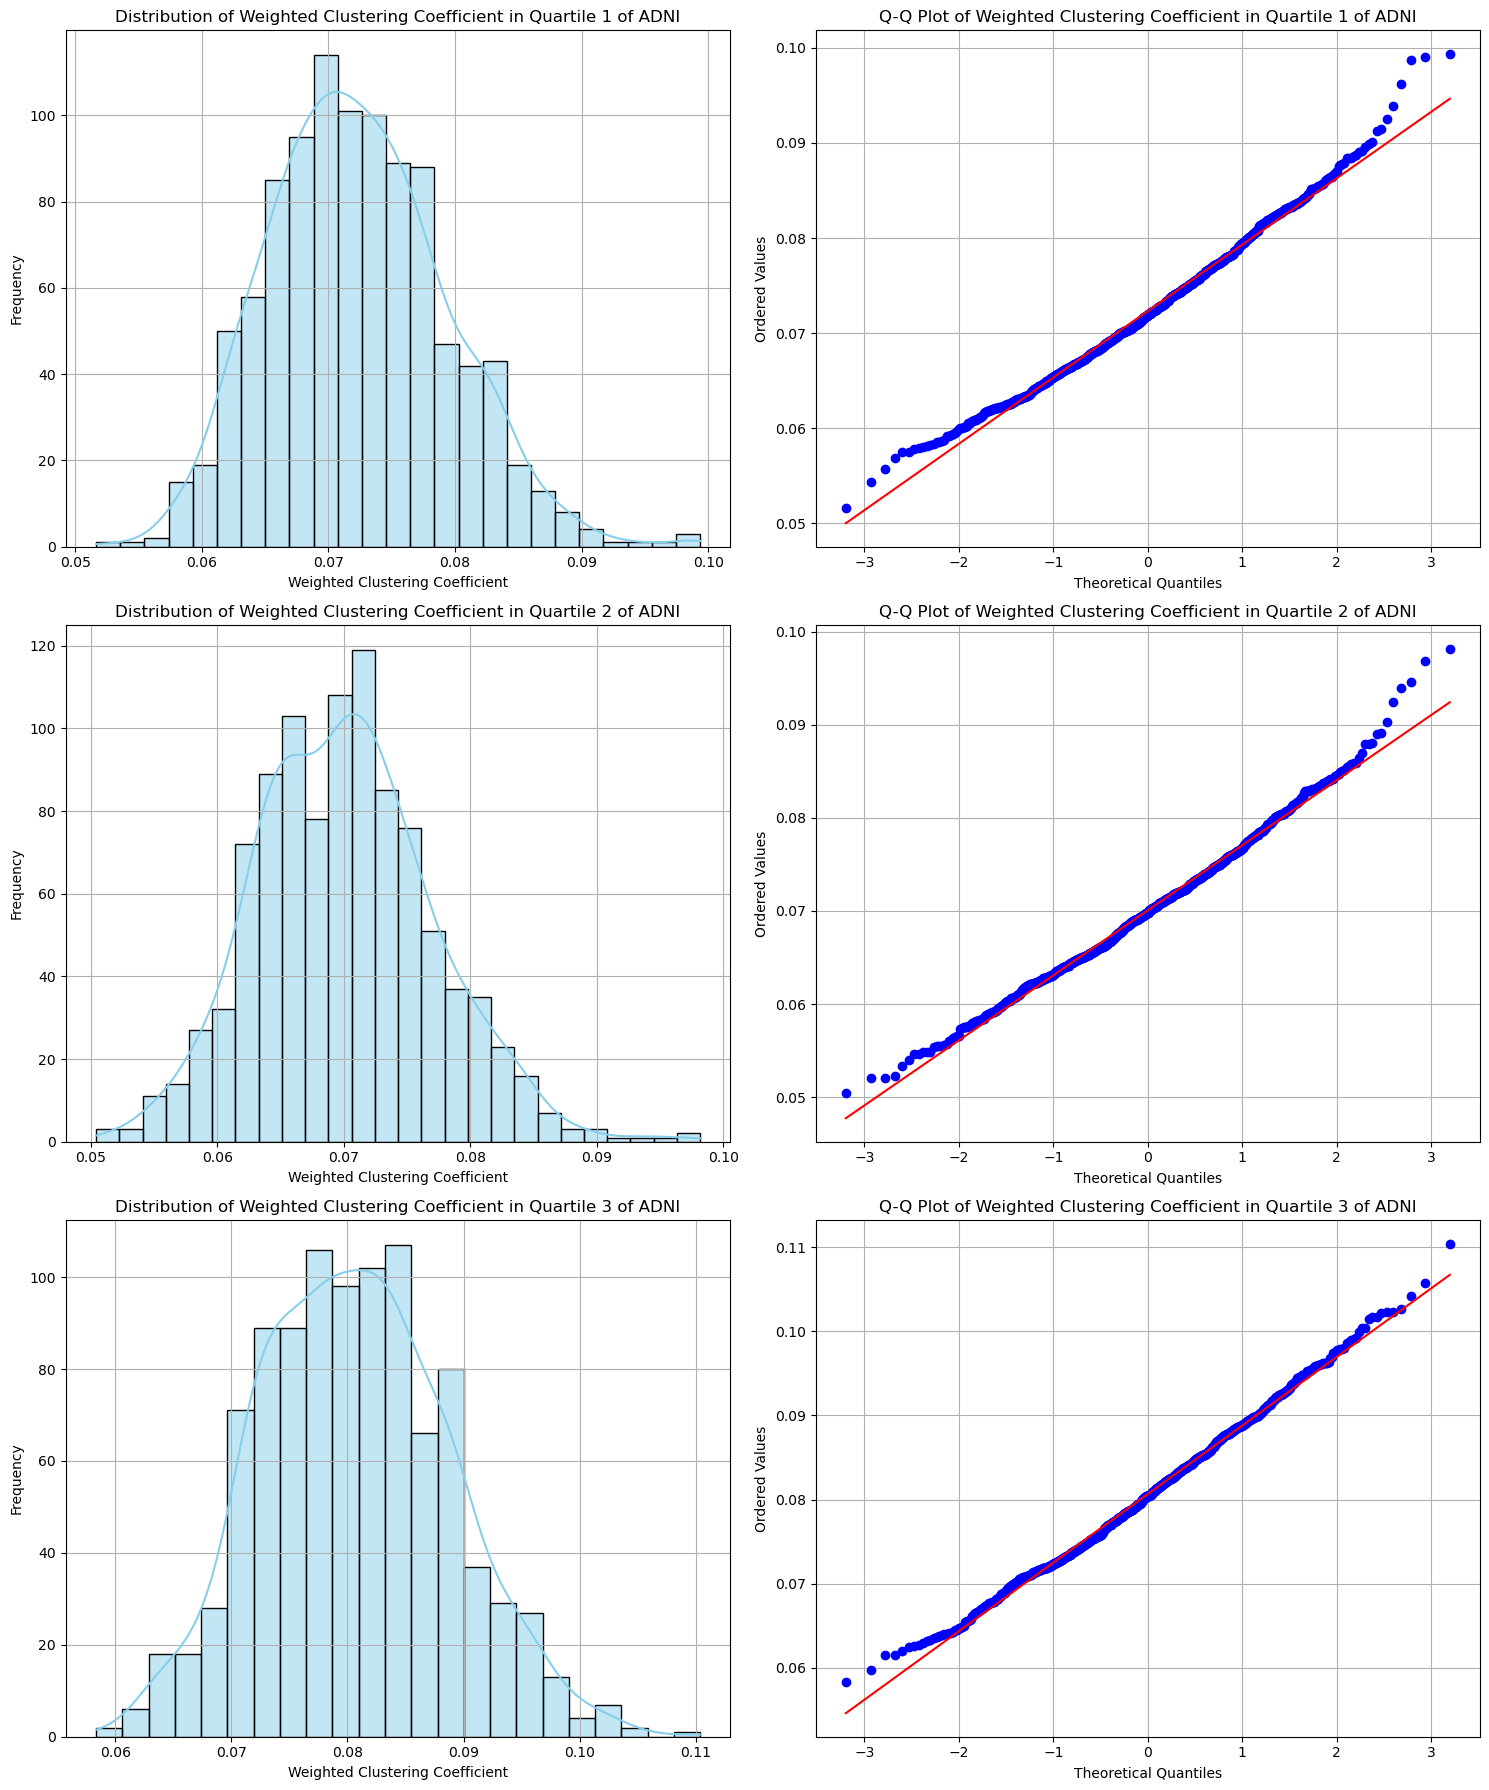

In [54]:
#call if for adni_gm
adni_gm_cc_plot = combined_plot(adni_gm, 'Weighted Clustering Coefficient')
# plt.show()

adni_gm_cc_plot.savefig('new_adni_cc_metric_dis.pdf', dpi=300, format='pdf')

The above plots appear gaussian enough so I think it's good

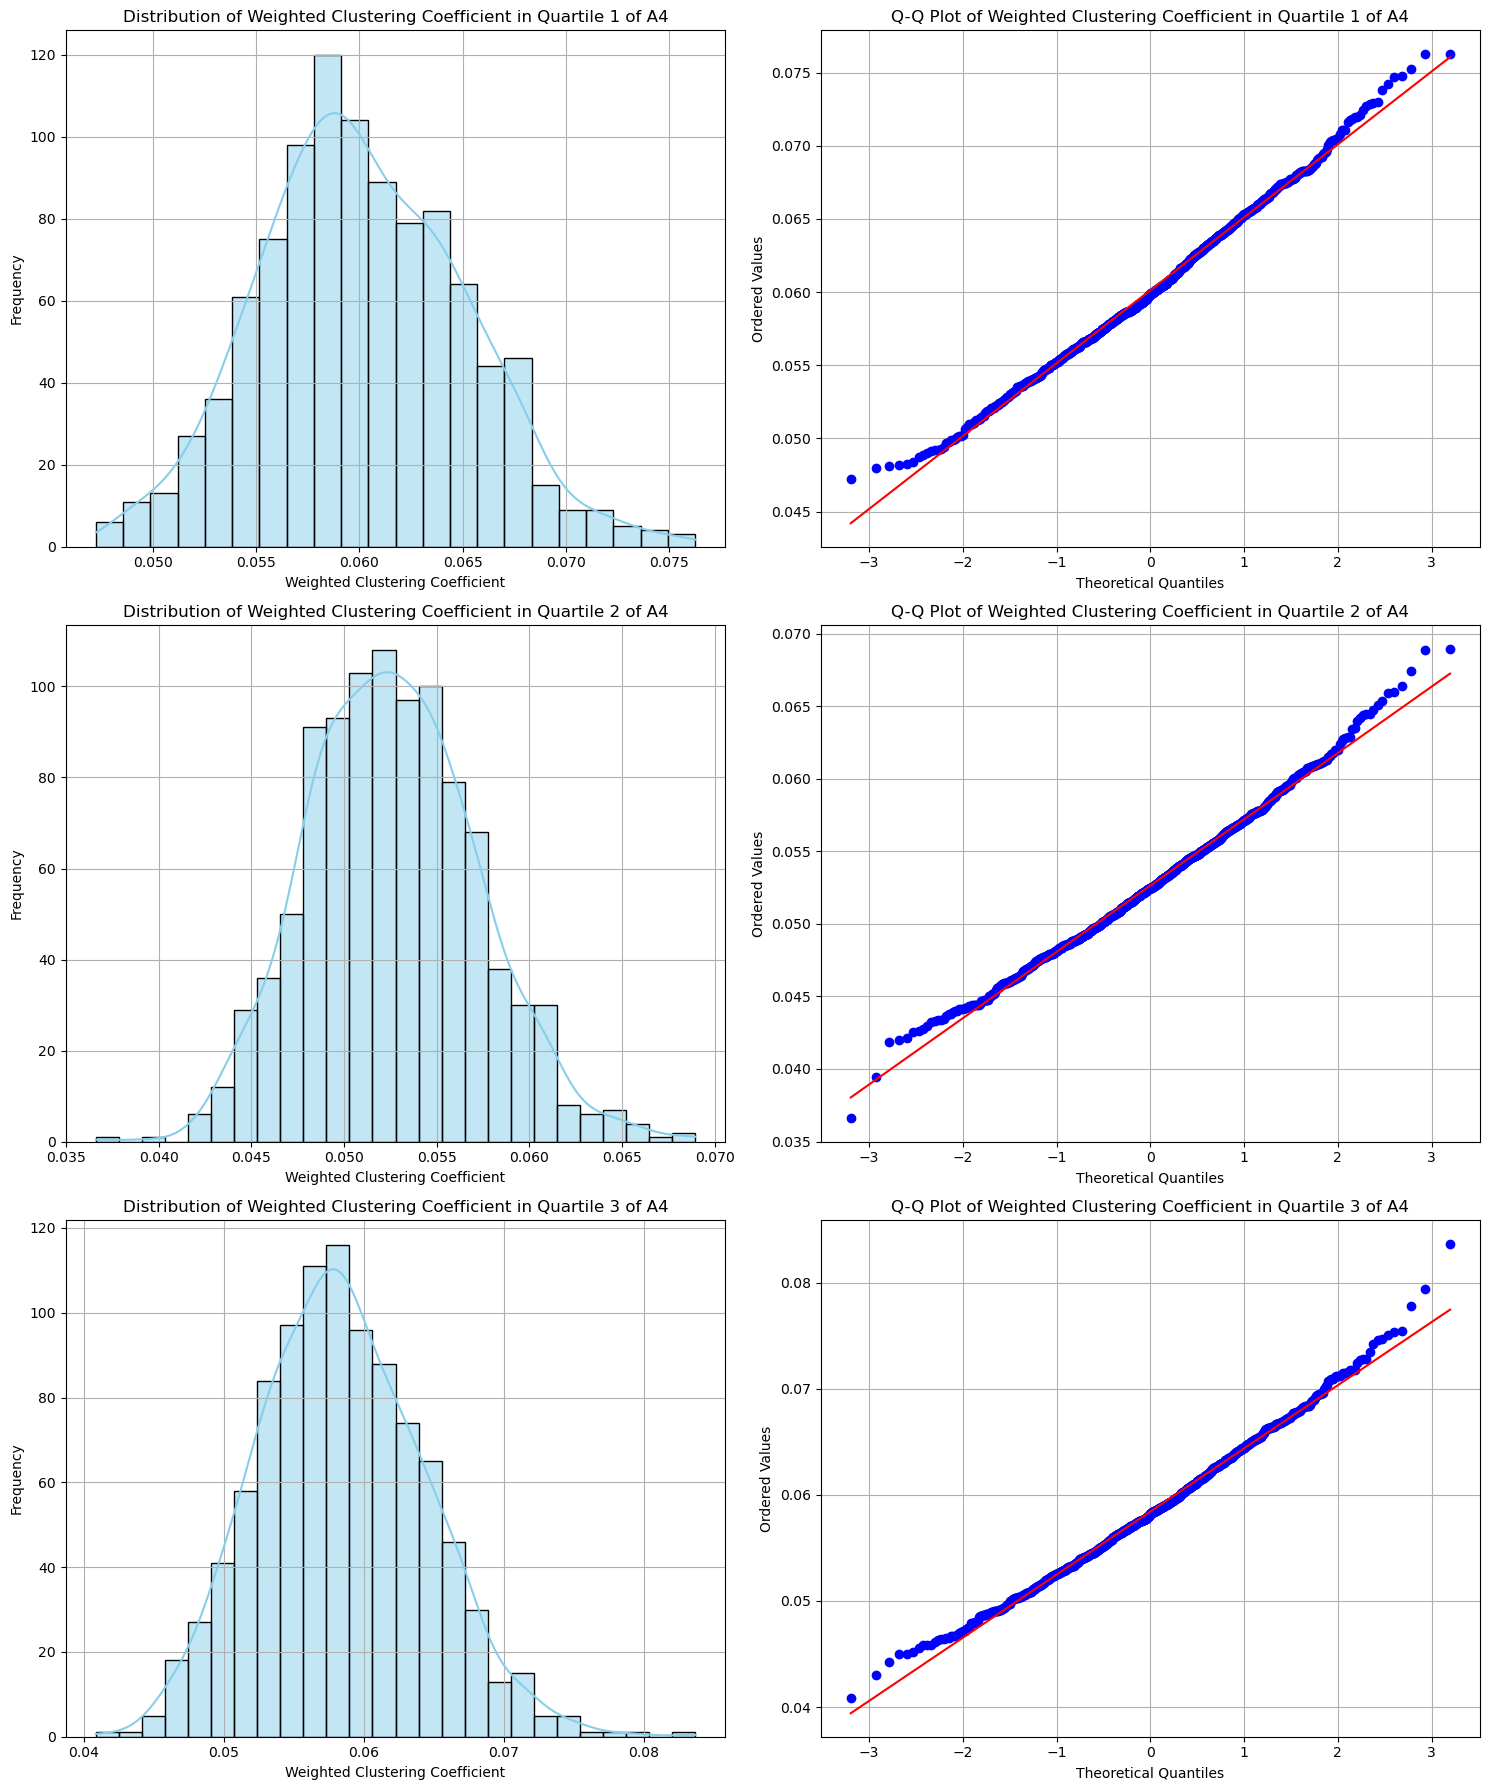

In [55]:
combined_plot(a4_gm, 'Weighted Clustering Coefficient')
plt.savefig('new_a4_cc_metric_dis.pdf', dpi=300, format='pdf')

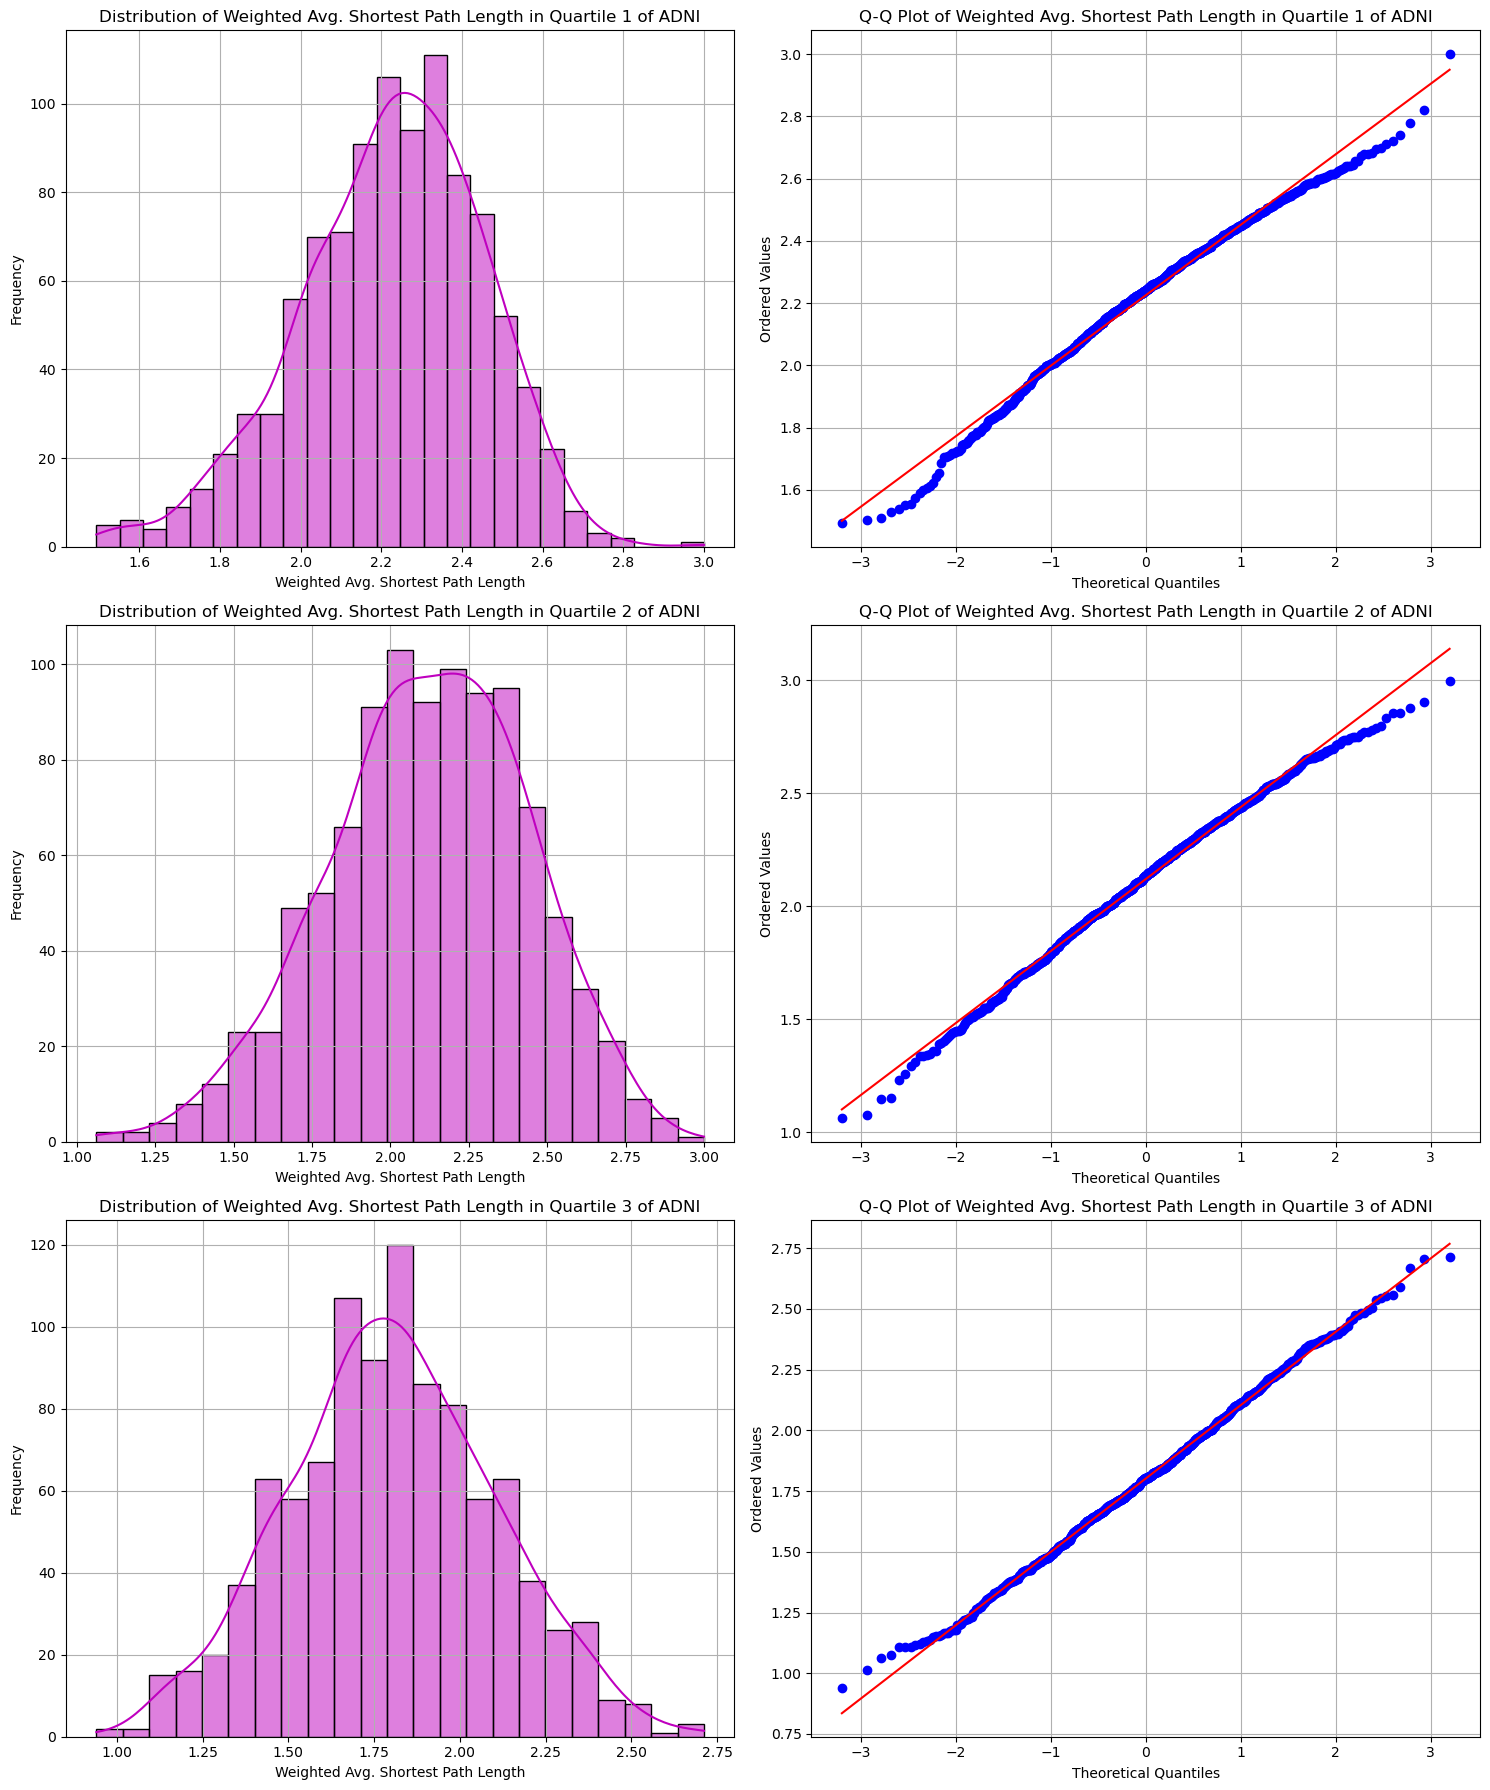

In [56]:
combined_plot(adni_gm, 'Weighted Avg. Shortest Path Length')
plt.savefig('new_adni_spl_metric_dis.pdf', dpi=300, format='pdf')

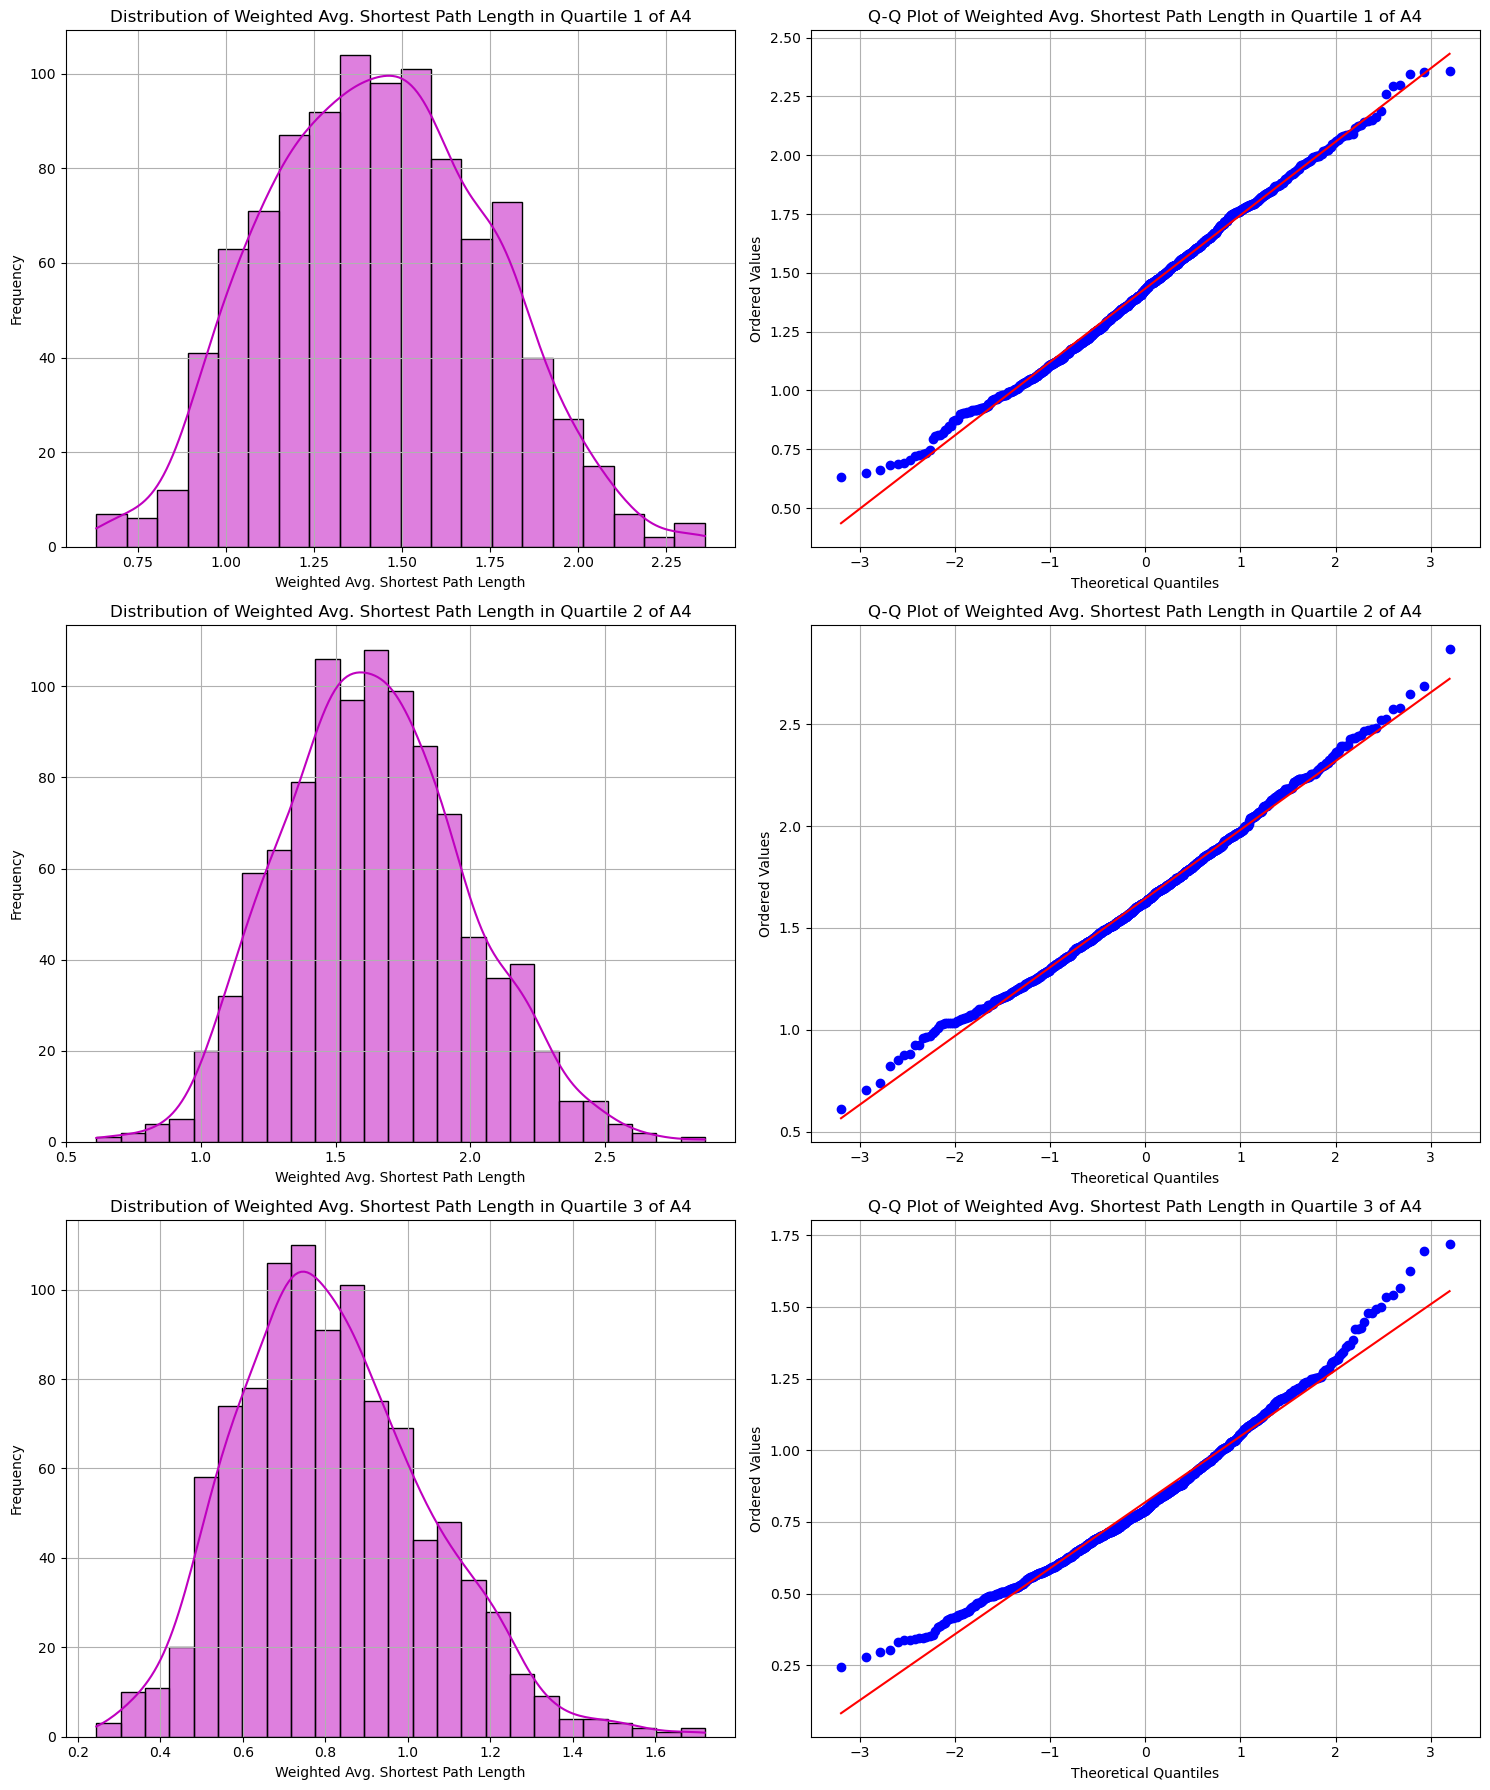

In [57]:
combined_plot(a4_gm, 'Weighted Avg. Shortest Path Length')
plt.savefig('new_a4_spl_metric_dis.pdf', dpi=300, format='pdf')

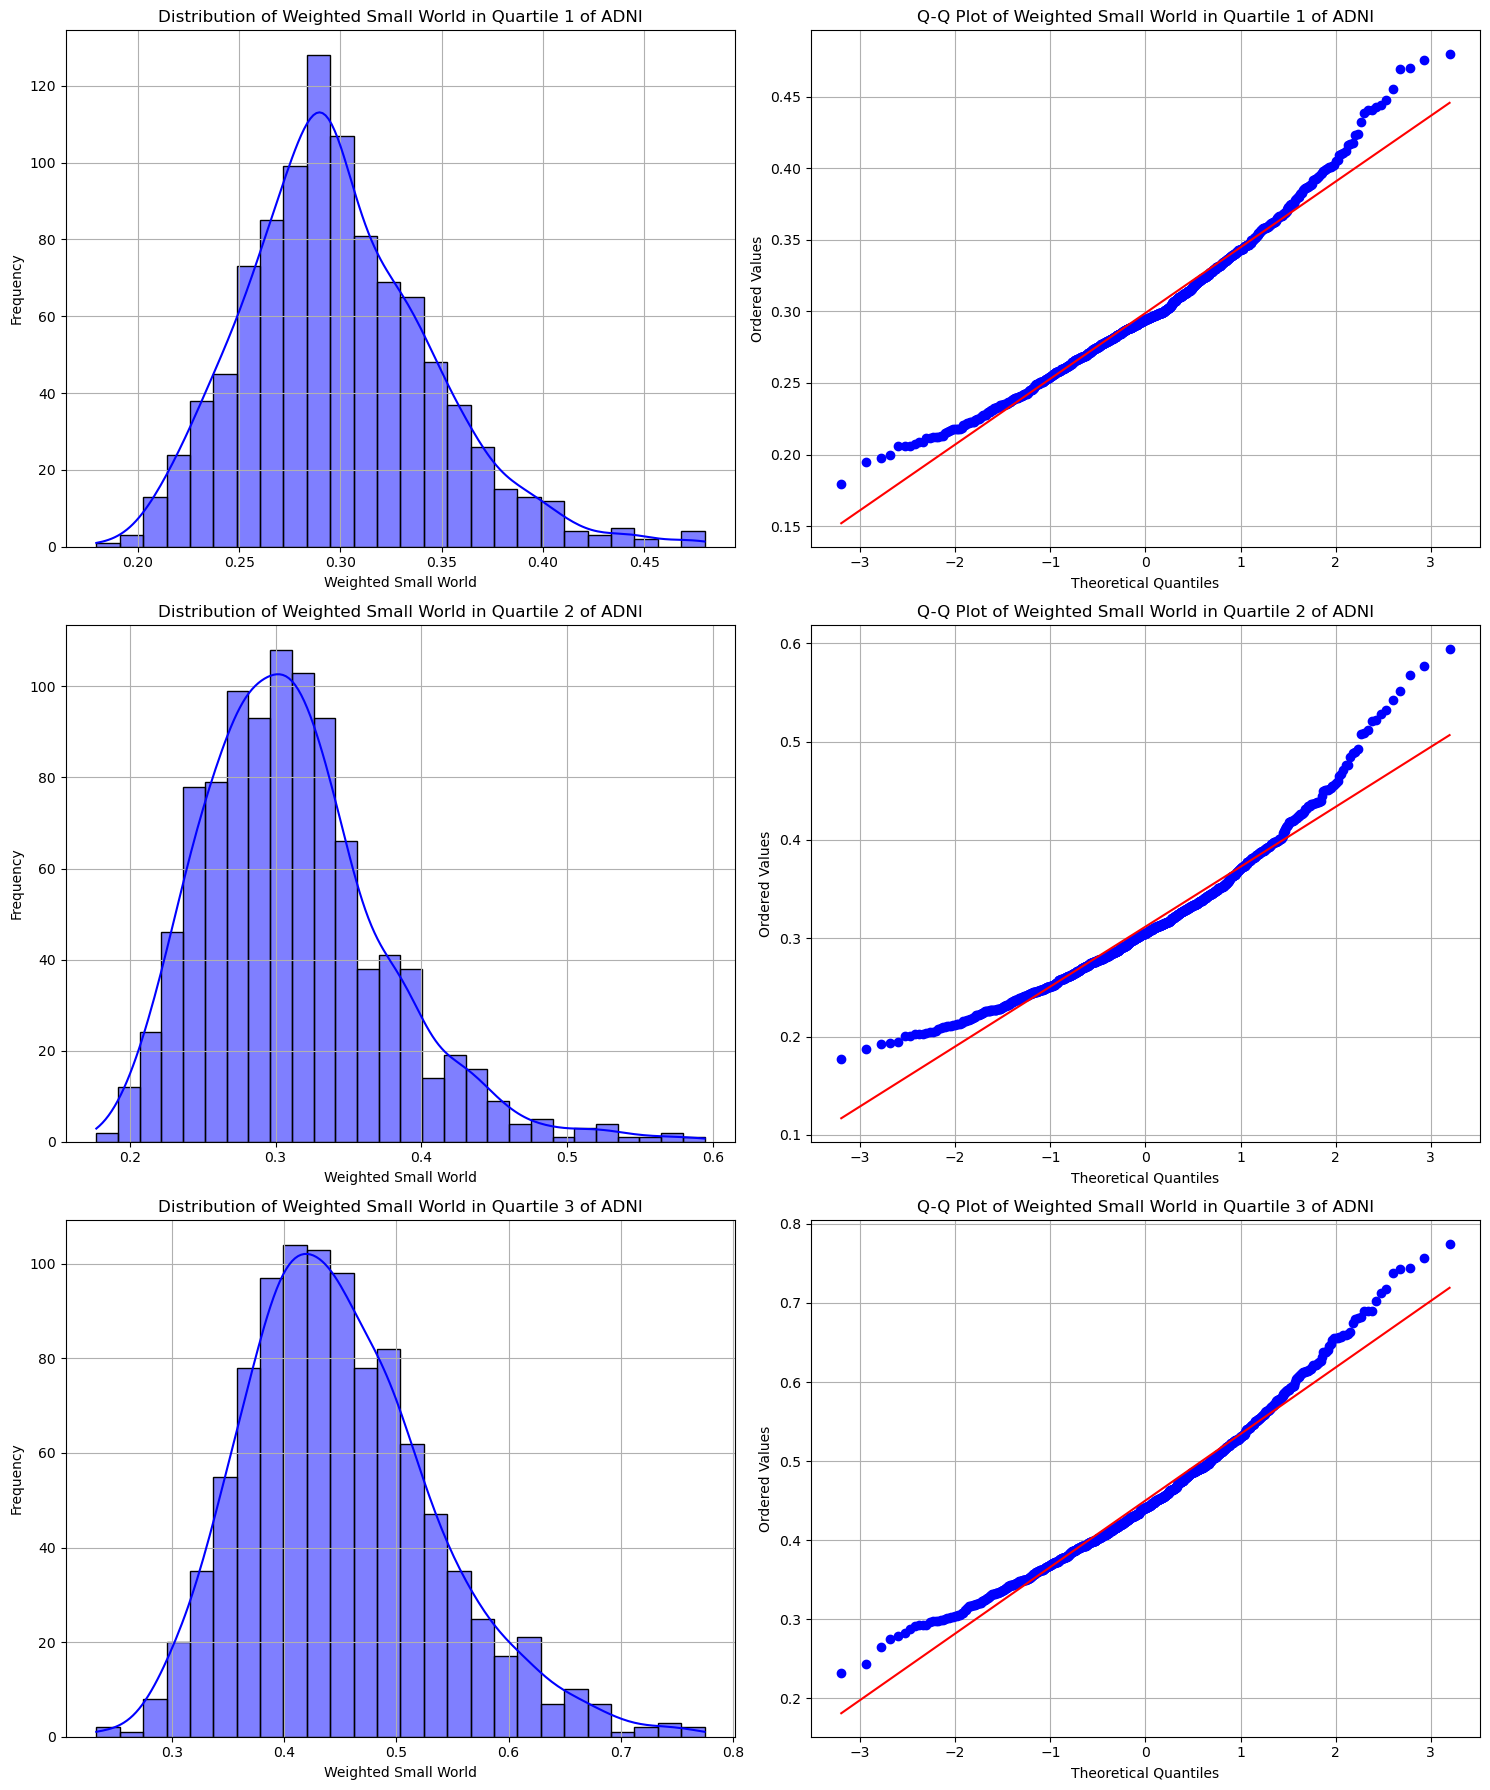

In [58]:
combined_plot(adni_gm, 'Weighted Small World')
plt.savefig('new_adni_sm_metric_dis.pdf', dpi=300, format='pdf')

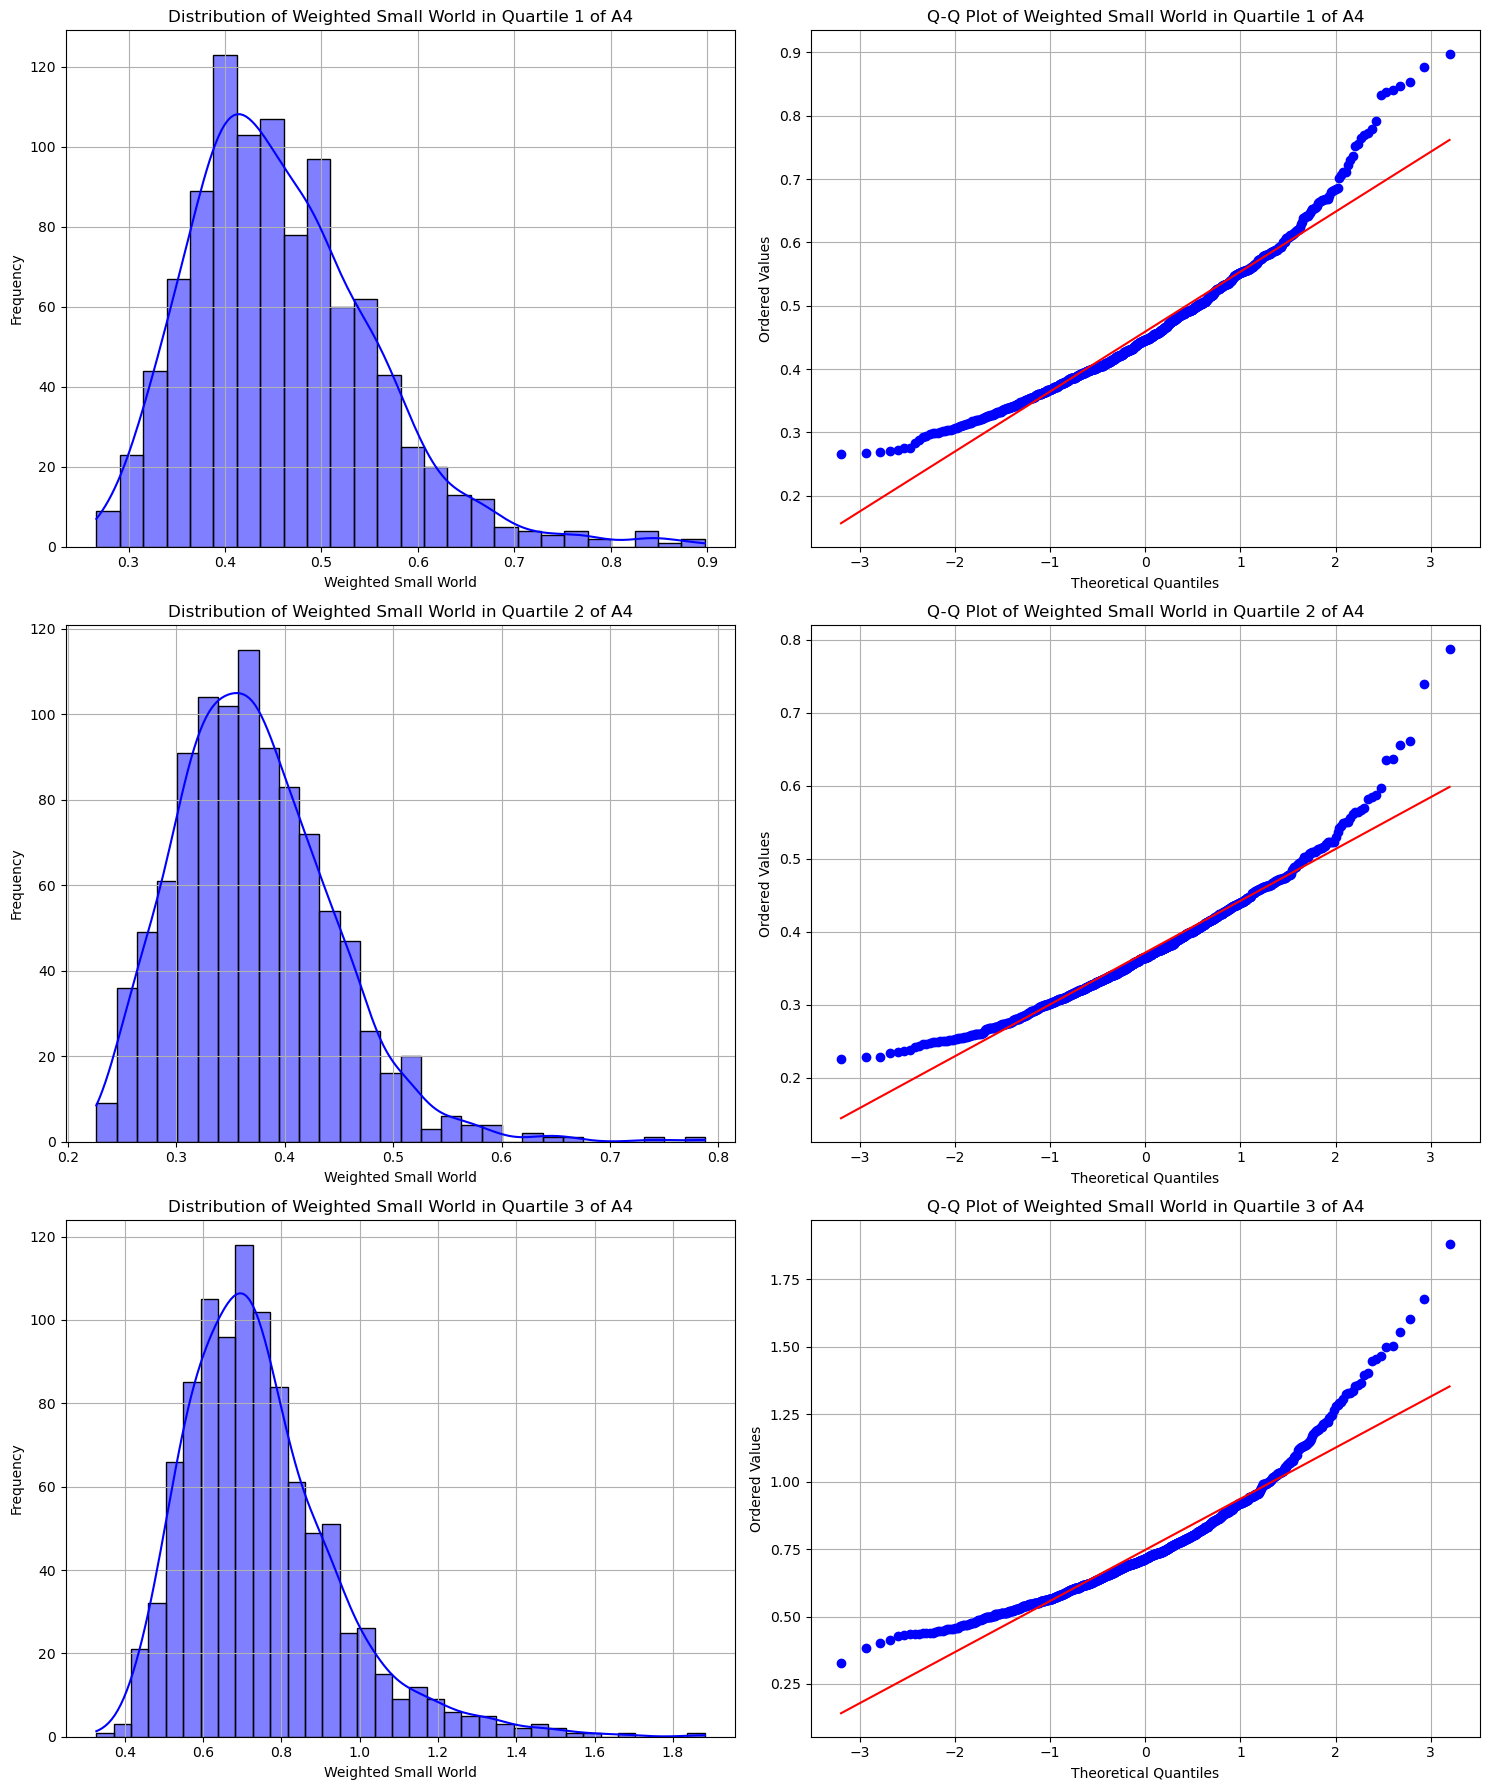

In [59]:
combined_plot(a4_gm, 'Weighted Small World')
plt.savefig('new_a4_sm_metric_dis.pdf', dpi=300, format='pdf')

* Curvatire at both ends (kurtosis) indicates a deviation from the normality assumption
* Use a non parametric statistical test 
* ex: mann-whitney u test to compare 2 indepdent saples 